# Add 10% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils, sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_clean = df.copy()

## Age

In [2]:
df = df_clean.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')


--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 10)

Outliers found:


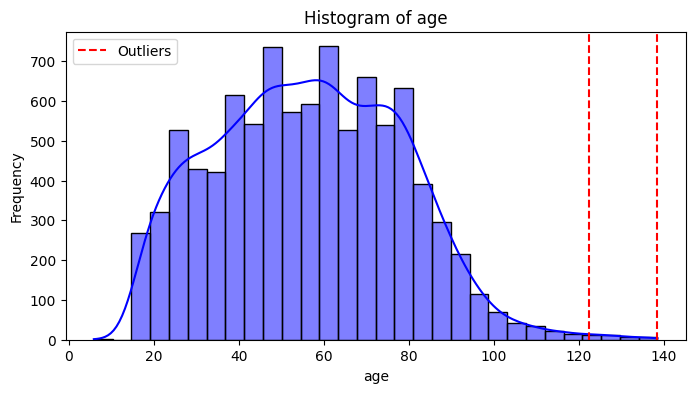

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1434
           1       0.83      0.94      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.88      0.88      0.88      2809

Node Labels:
 Annotation(0.590503, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


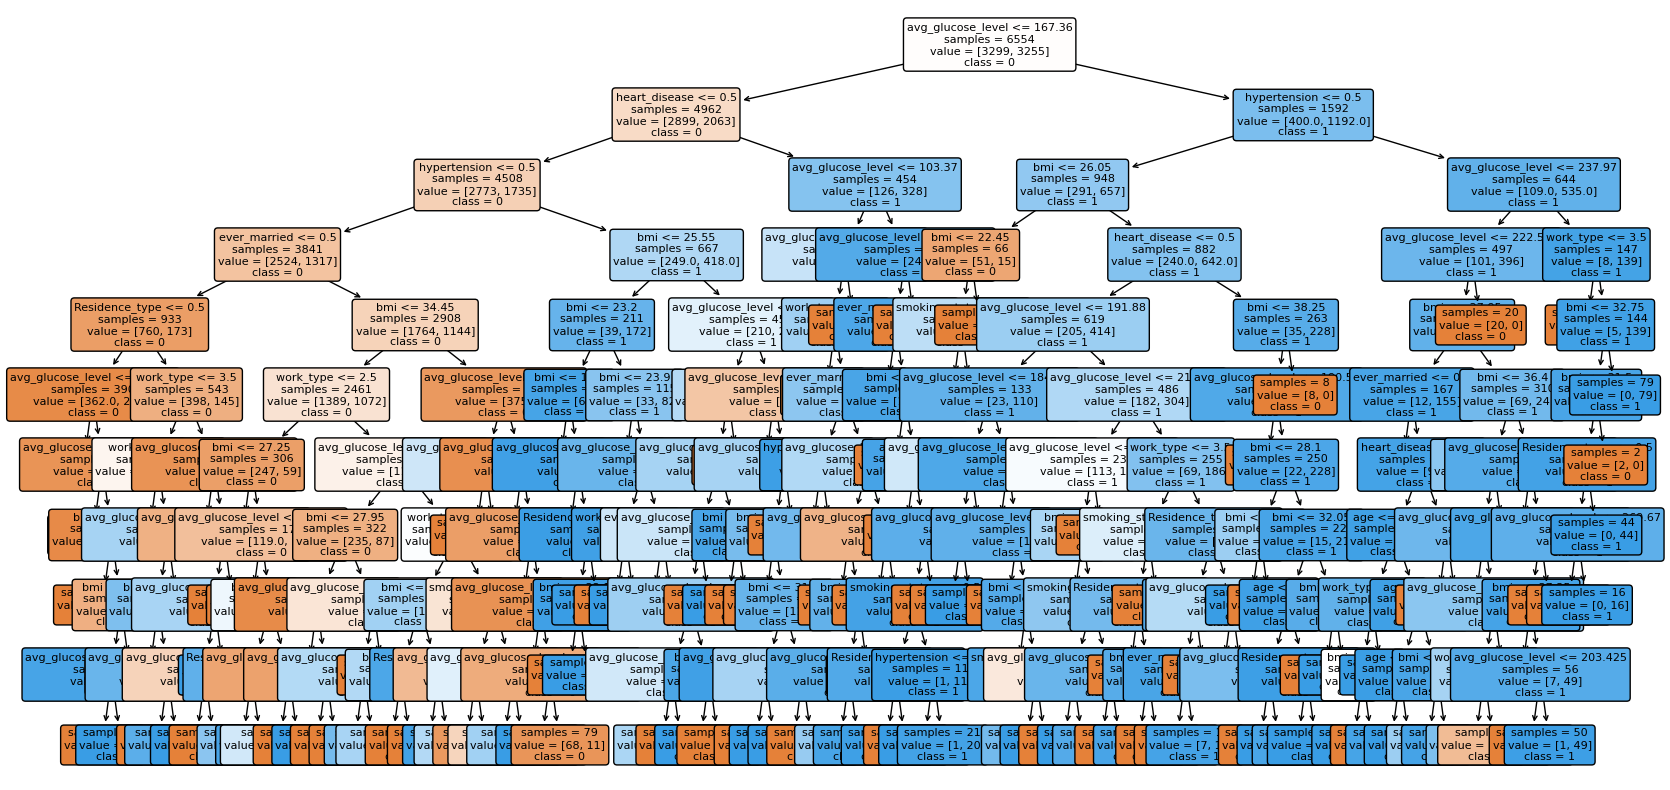

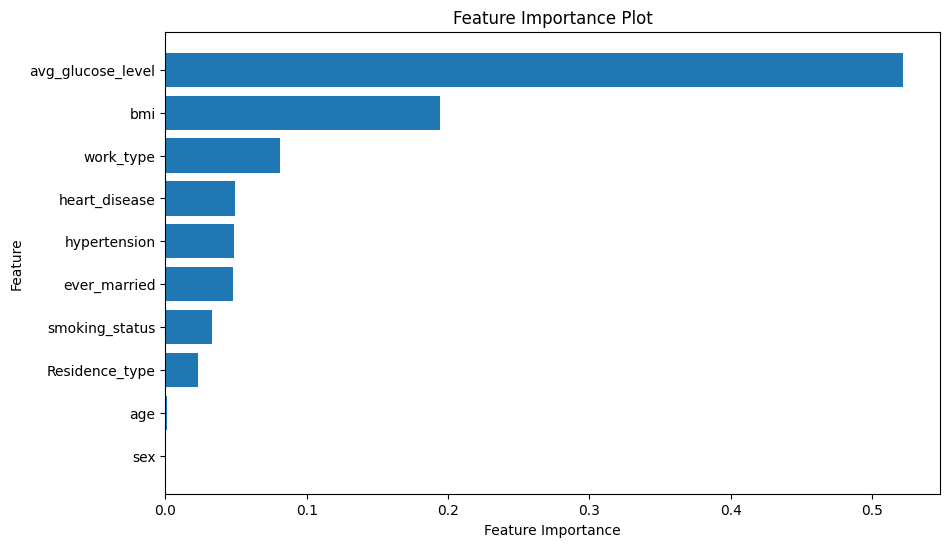

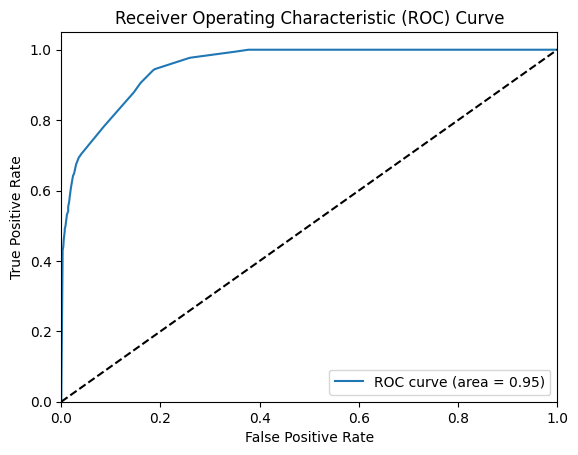

AUC Score: 0.9532539622163053


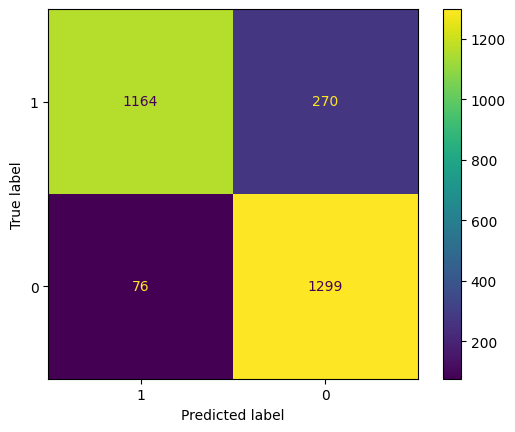

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8576512455516014, 0.8078291814946619, 0.8078291814946619, 0.7900355871886121, 0.8256227758007118, 0.8612099644128114, 0.8434163701067615, 0.8576512455516014, 0.7793594306049823, 0.8392857142857143]
Mean accuracy: 0.8269890696492119
95% confidence interval: (0.8058719901993346, 0.8481061490990892)


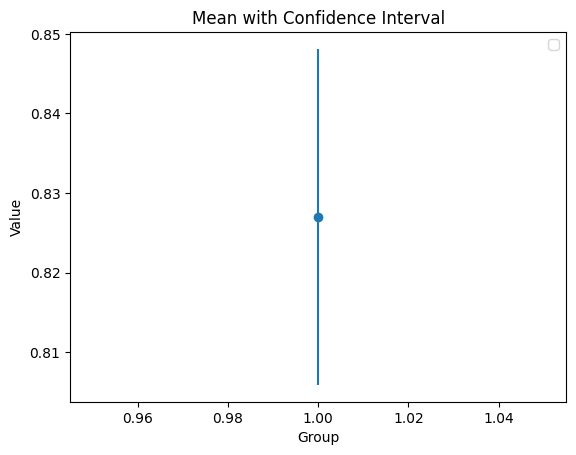

In [6]:
y_pred_prob_age_dt, y_test_age_dt, classification_report_dt_age, decision_tree = ML_algorithms.model_dt(df_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)


**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1434
           1       0.89      0.91      0.90      1375

    accuracy                           0.90      2809
   macro avg       0.90      0.90      0.90      2809
weighted avg       0.90      0.90      0.90      2809



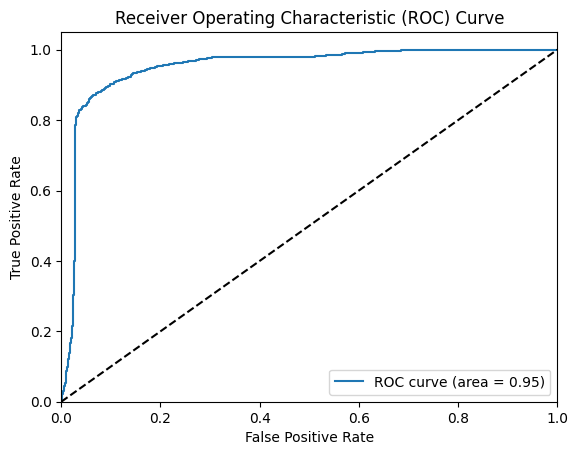

AUC Score: 0.9493520983897553


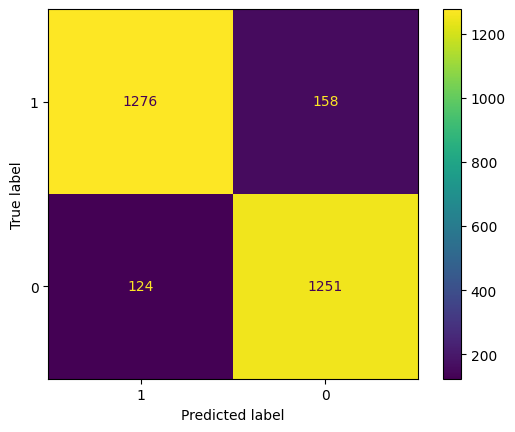

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7935943060498221, 0.7508896797153025, 0.7829181494661922, 0.800711743772242, 0.7544483985765125, 0.7366548042704626, 0.7508896797153025, 0.7473309608540926, 0.7366548042704626, 0.7928571428571428]
Mean accuracy: 0.7646949669547534
95% confidence interval: (0.7468225783465394, 0.7825673555629673)


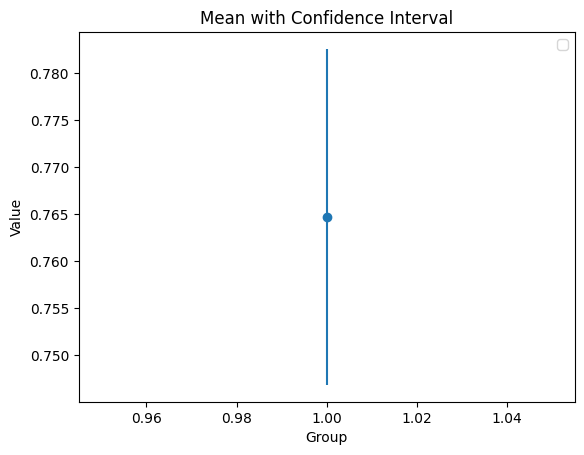

In [7]:
y_pred_prob_age_svm, y_test_age_svm, classification_report_svm_age, svm = ML_algorithms.model_svm(df_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_age, 'age')

Outliers found:


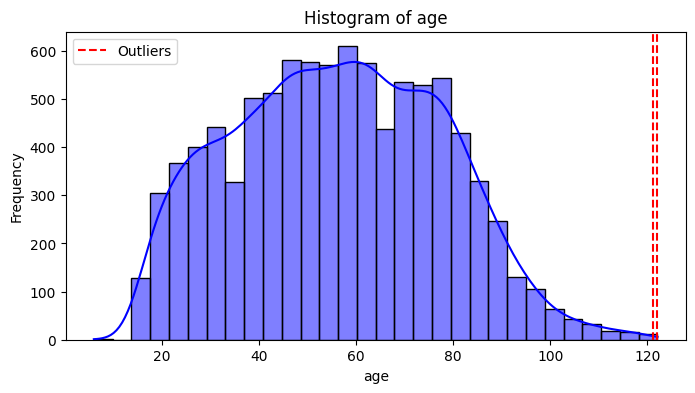

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1434
           1       0.83      0.94      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.88      0.88      0.88      2809

Node Labels:
 Annotation(0.590503, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


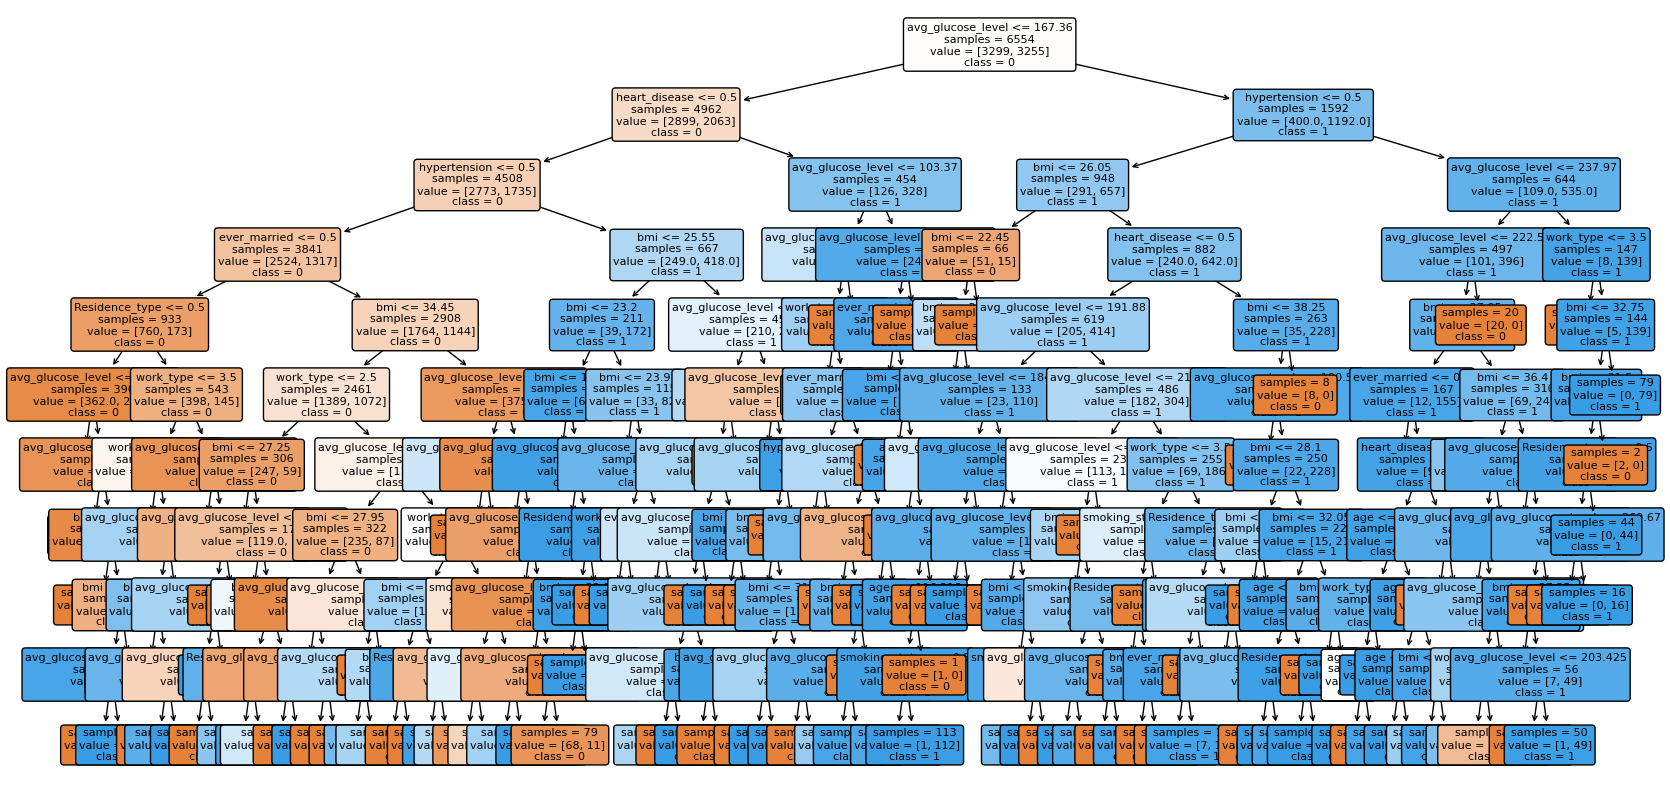

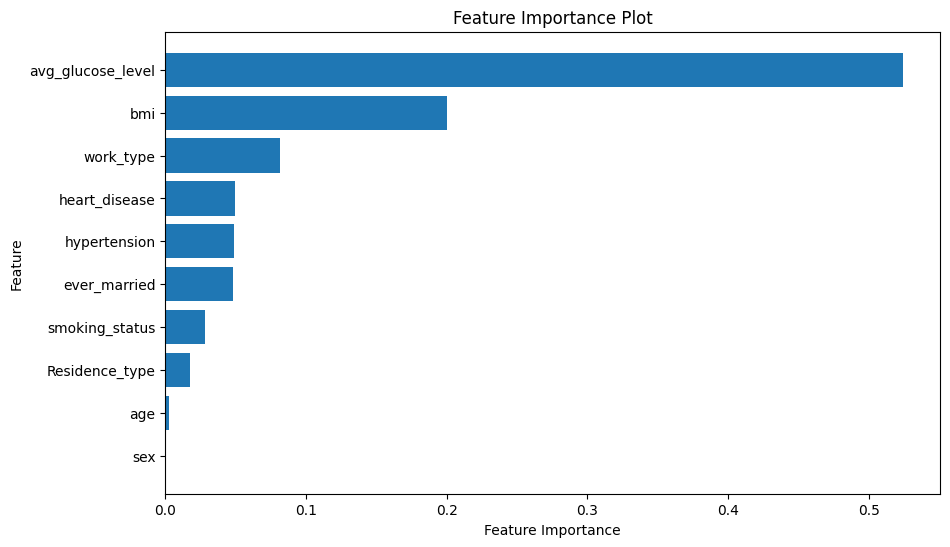

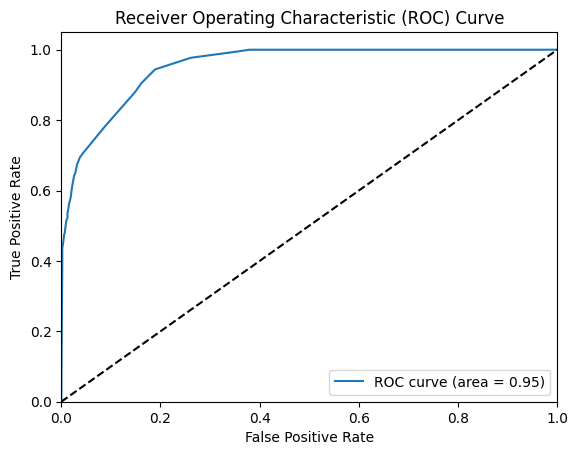

AUC Score: 0.9524574616457462


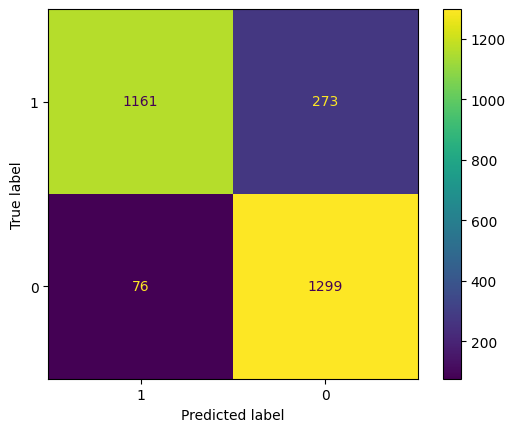

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8398576512455516, 0.8078291814946619, 0.8469750889679716, 0.7864768683274022, 0.8469750889679716, 0.8078291814946619, 0.8683274021352313, 0.8398576512455516, 0.8149466192170819, 0.7964285714285714]
Mean accuracy: 0.8255503304524657
95% confidence interval: (0.806664898353891, 0.8444357625510405)


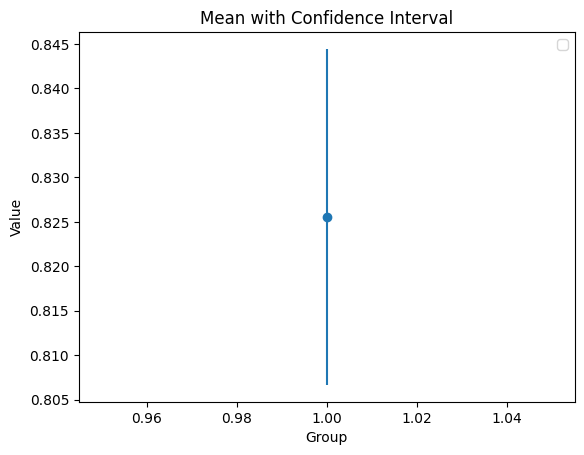

In [10]:
y_prob_dt_20_age, y_test_dt_20_age, classification_report_dt_20_age, decision_tree = ML_algorithms.model_dt(df_mean_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1434
           1       0.89      0.91      0.90      1375

    accuracy                           0.90      2809
   macro avg       0.90      0.90      0.90      2809
weighted avg       0.90      0.90      0.90      2809



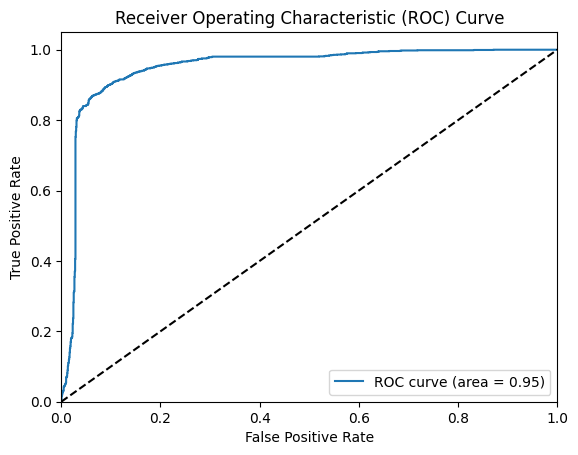

AUC Score: 0.9488779003423354


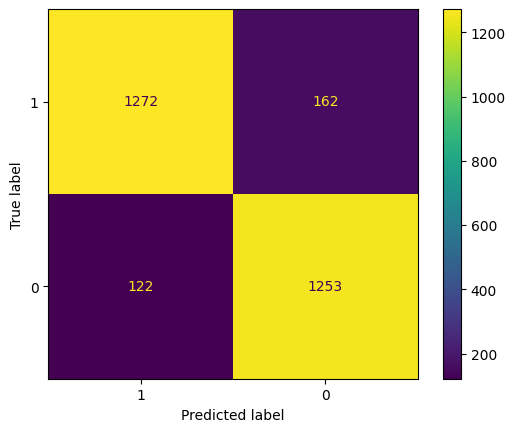

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7508896797153025, 0.7473309608540926, 0.797153024911032, 0.7437722419928826, 0.7402135231316725, 0.7437722419928826, 0.7829181494661922, 0.7686832740213523, 0.8220640569395018, 0.7892857142857143]
Mean accuracy: 0.7686082867310626
95% confidence interval: (0.7485000270922467, 0.7887165463698785)


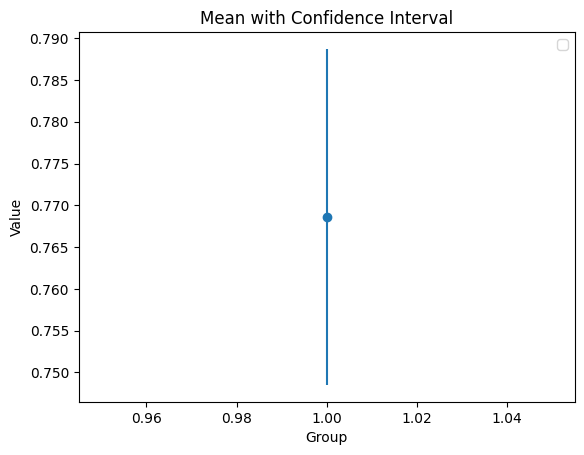

--------------------------------------


In [11]:
y_prob_svm_20_age, y_test_svm_20_age, classification_report_svm_20_age, svm = ML_algorithms.model_svm(df_mean_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_clean.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 10)

Outliers found:


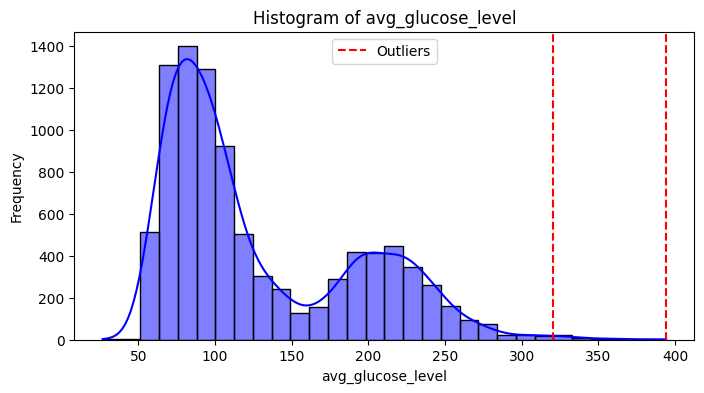

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1434
           1       0.78      0.88      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.83      0.82      0.82      2809

Node Labels:
 Annotation(0.59403, 0.954545, 'hypertension <= 0.5\nsamples = 6554\nvalue = [3315, 3239]\nclass = 0')


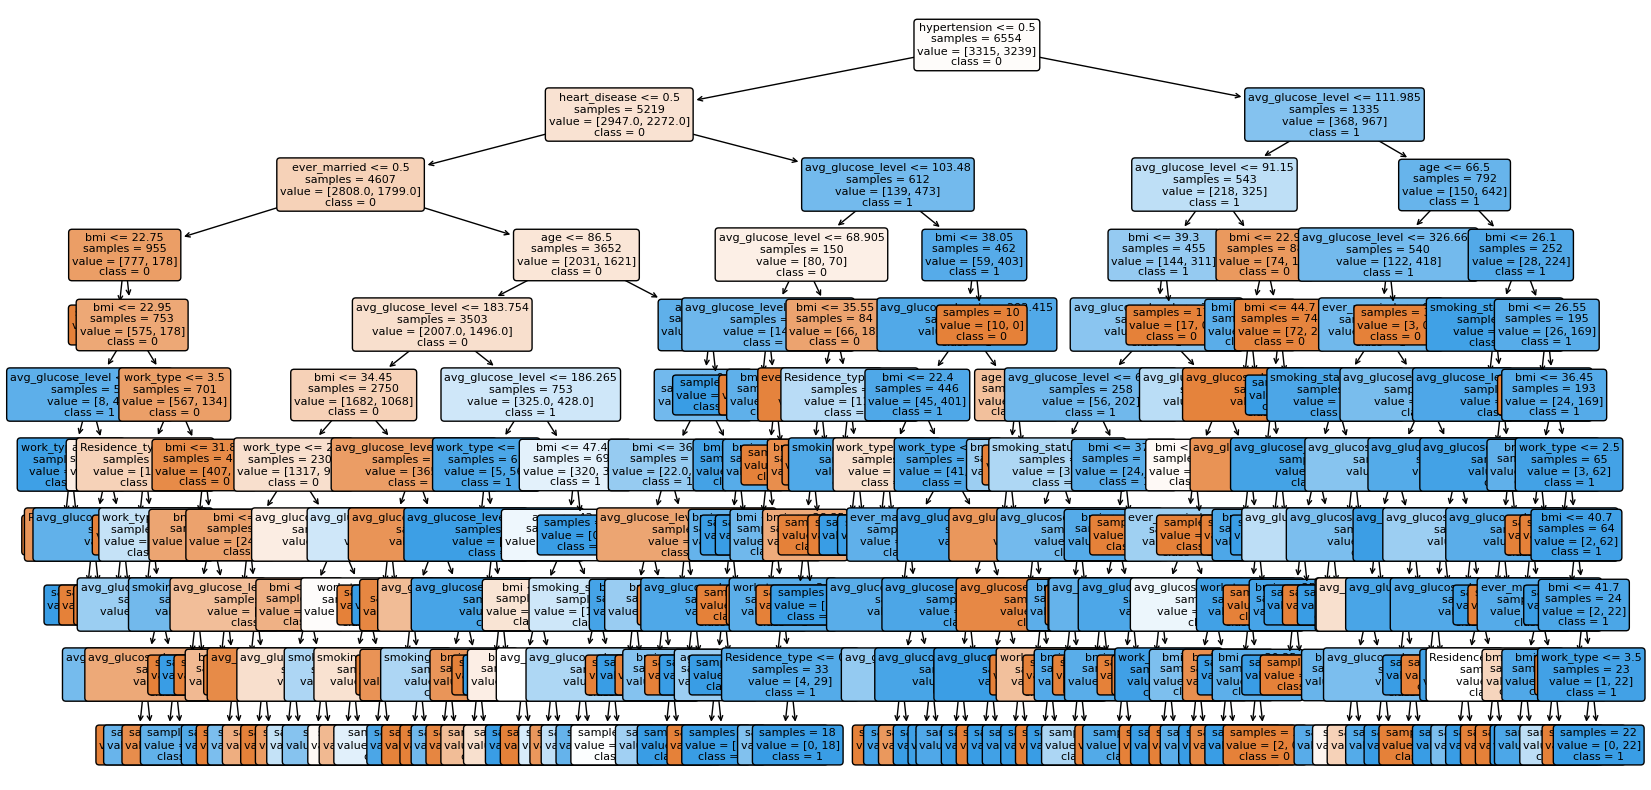

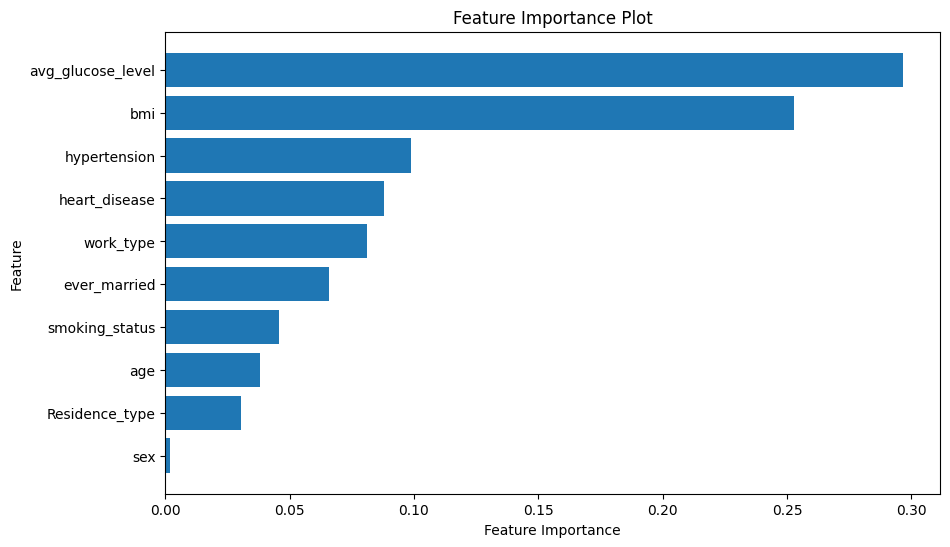

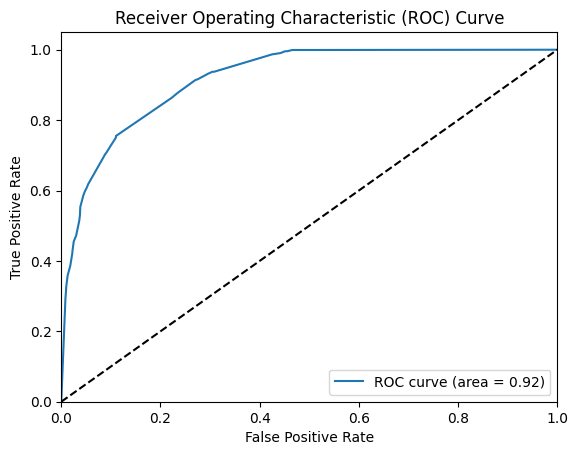

AUC Score: 0.9171649549892228


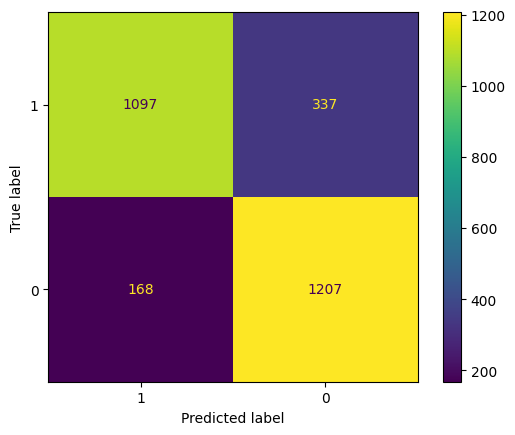

Accuracy for each fold: [0.8327402135231317, 0.8078291814946619, 0.8113879003558719, 0.8327402135231317, 0.8398576512455516, 0.8113879003558719, 0.8291814946619217, 0.8256227758007118, 0.8576512455516014, 0.7642857142857142]
Mean accuracy: 0.8212684290798169
95% confidence interval: (0.8033655325273873, 0.8391713256322465)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


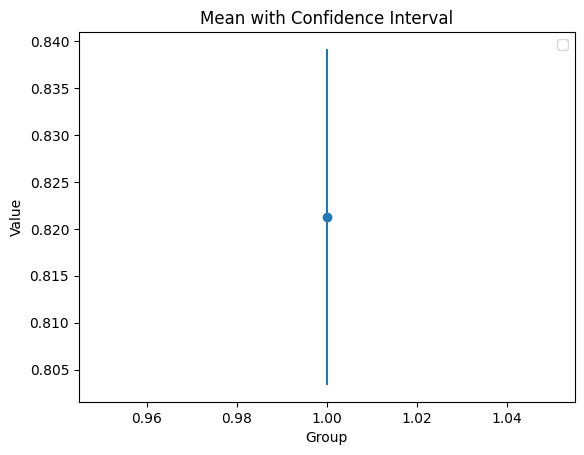

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, classification_report_dt_glucose, decision_tree = ML_algorithms.model_dt(df_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)


**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1434
           1       0.87      0.90      0.89      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809



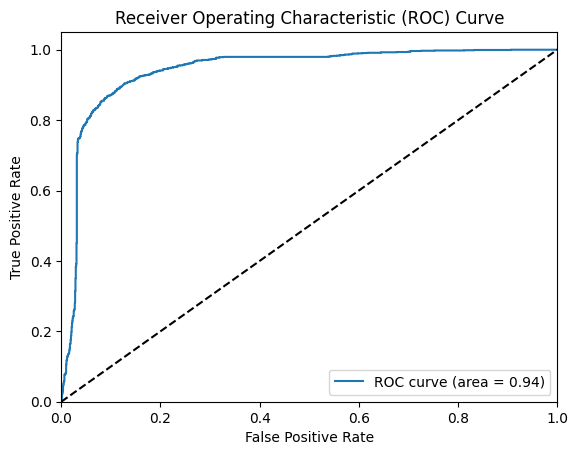

AUC Score: 0.9414471915810828


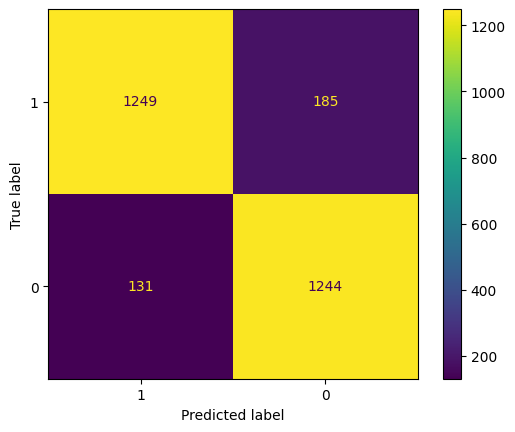

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.797153024911032, 0.7295373665480427, 0.7686832740213523, 0.8042704626334519, 0.7935943060498221, 0.7758007117437722, 0.7793594306049823, 0.7686832740213523, 0.7758007117437722, 0.7392857142857143]
Mean accuracy: 0.7732168276563295
95% confidence interval: (0.7561813875123694, 0.7902522678002896)


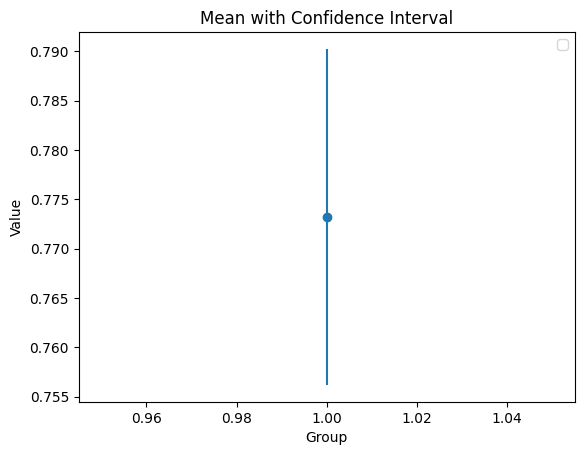

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, classification_report_svm_glucose, svm = ML_algorithms.model_svm(df_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_glucose, 'avg_glucose_level')

Outliers found:


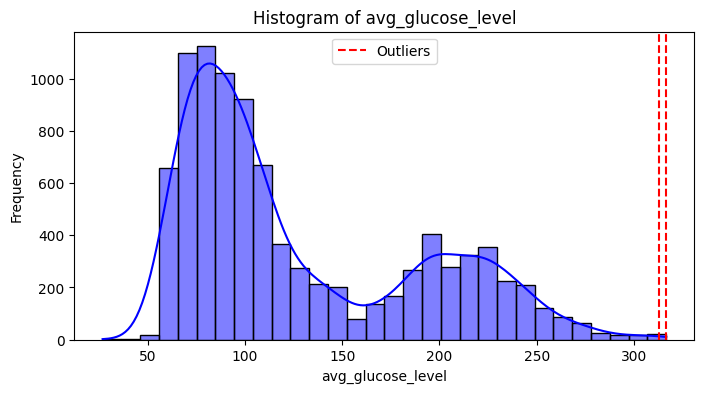

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1434
           1       0.78      0.89      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.83      0.82      0.82      2809
weighted avg       0.83      0.82      0.82      2809

Node Labels:
 Annotation(0.578827, 0.954545, 'hypertension <= 0.5\nsamples = 6554\nvalue = [3315, 3239]\nclass = 0')


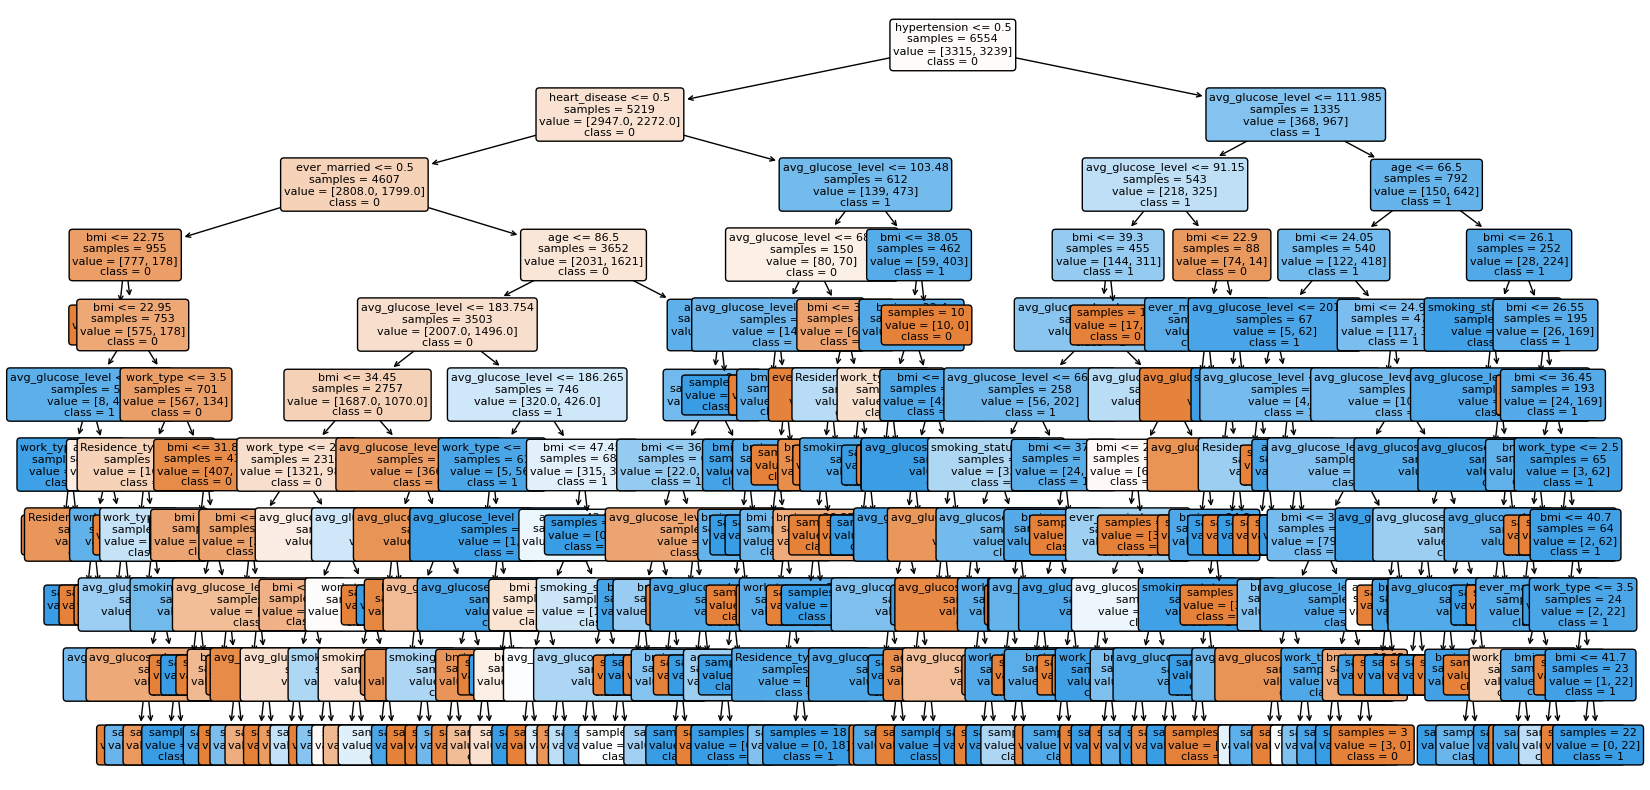

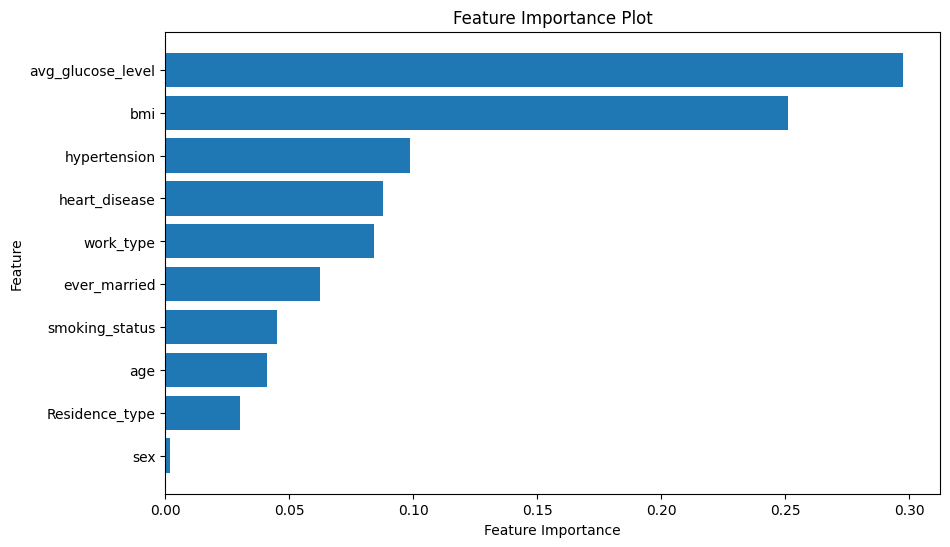

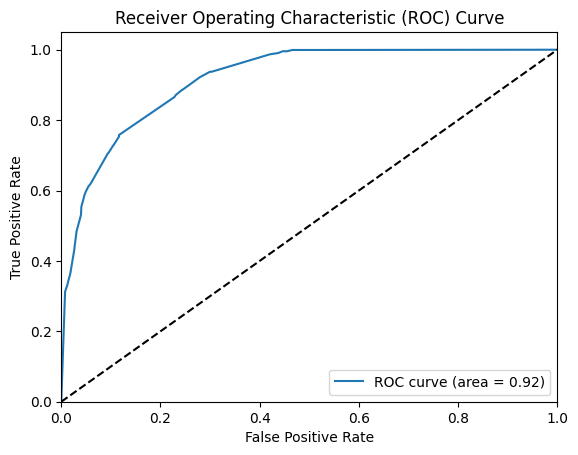

AUC Score: 0.9160697350069735


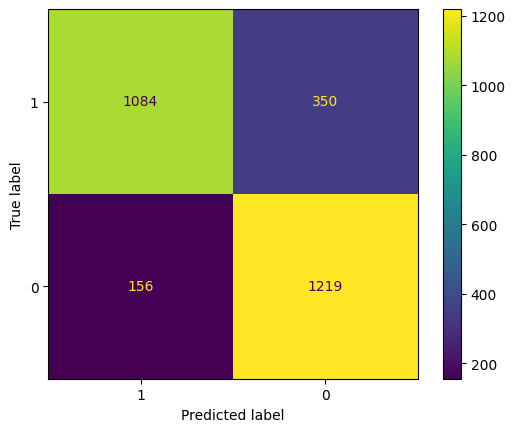

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.7793594306049823, 0.7686832740213523, 0.7722419928825622, 0.8434163701067615, 0.8327402135231317, 0.7864768683274022, 0.8362989323843416, 0.8256227758007118, 0.8214285714285714]
Mean accuracy: 0.8066980172852058
95% confidence interval: (0.7863215037849435, 0.8270745307854682)


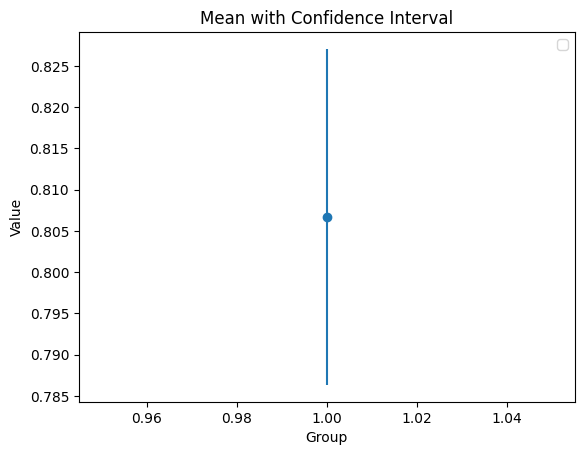

In [20]:
y_prob_dt_20_glucose, y_test_dt_20_glucose, classification_report_dt_20_glucose, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1434
           1       0.87      0.90      0.89      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809



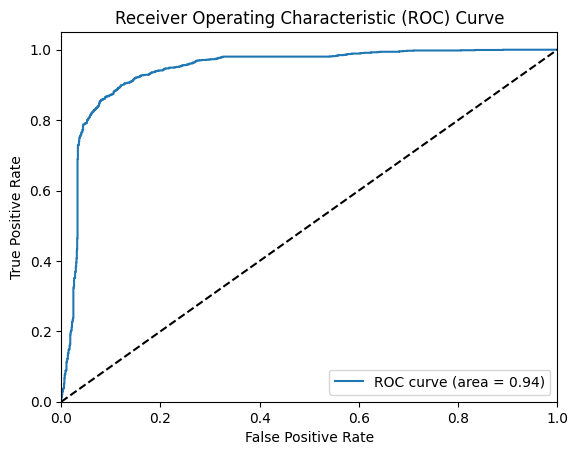

AUC Score: 0.9417776087232154


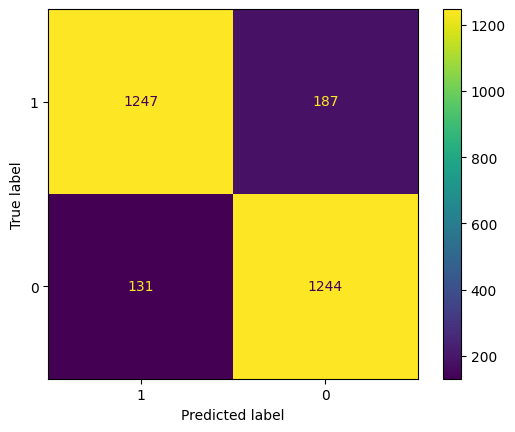

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7900355871886121, 0.7829181494661922, 0.7366548042704626, 0.7508896797153025, 0.7437722419928826, 0.7900355871886121, 0.7580071174377224, 0.797153024911032, 0.7793594306049823, 0.75]
Mean accuracy: 0.76788256227758
95% confidence interval: (0.7519604299543747, 0.7838046946007853)


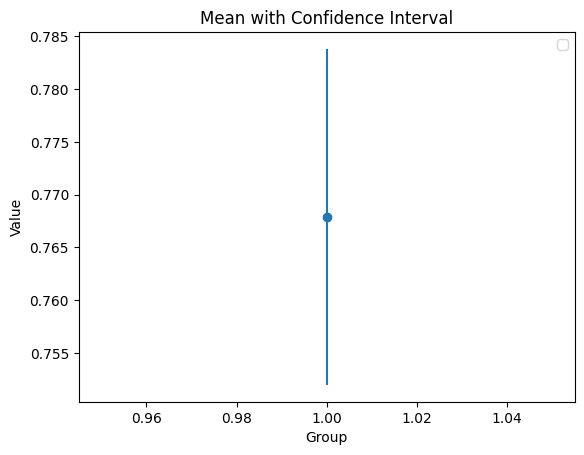

--------------------------------------


In [21]:
y_prob_svm_20_glucose, y_test_svm_20_glucose, classification_report_svm_20_glucose, svm = ML_algorithms.model_svm(df_mean_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## bmi

In [22]:
df = df_clean.copy()

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

--------------------------------------
no outliers detected


In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 10)

Outliers found:


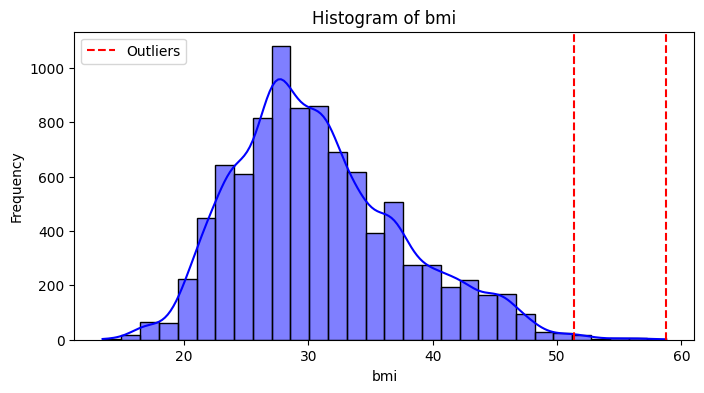

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1434
           1       0.82      0.85      0.84      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.624962, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6554\nvalue = [3283, 3271]\nclass = 0')


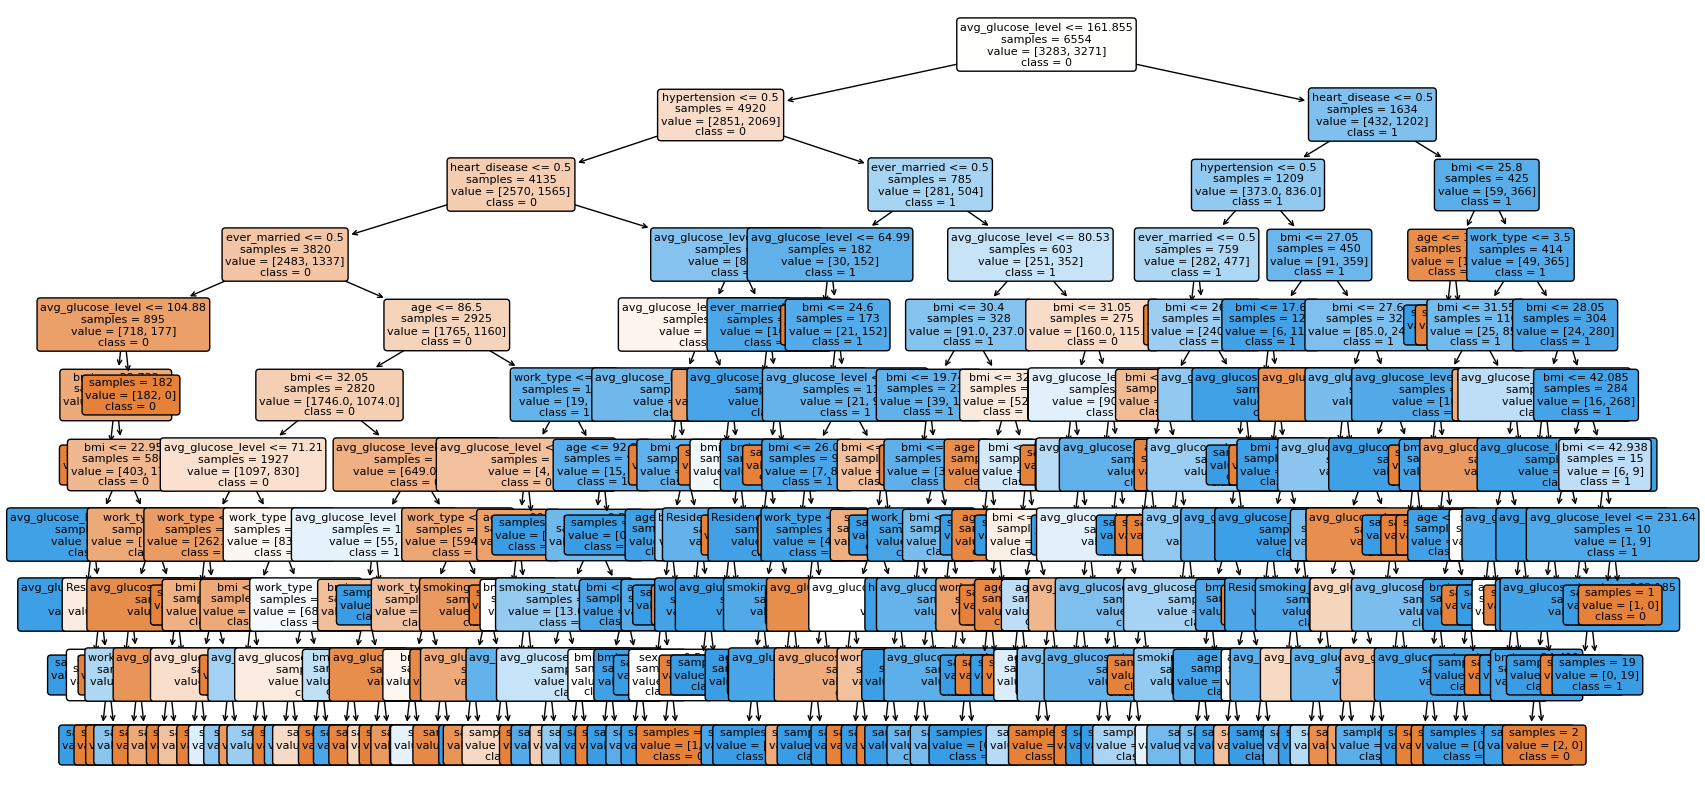

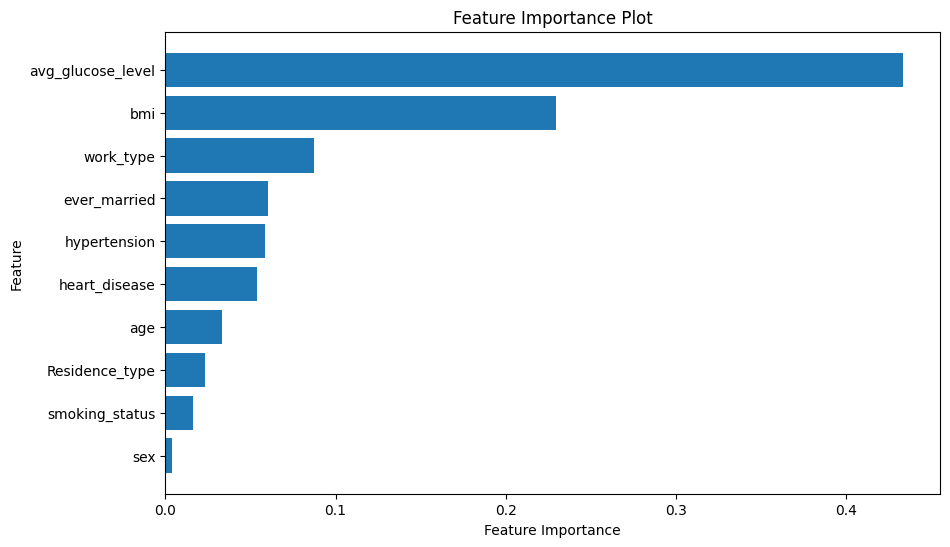

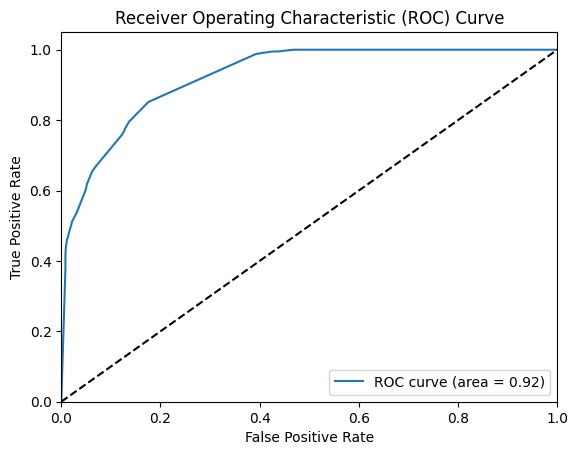

AUC Score: 0.923660961075187


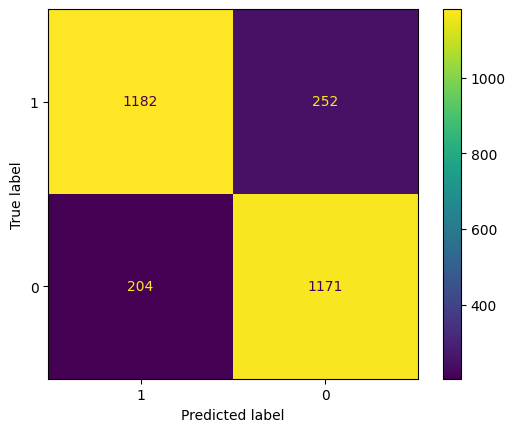

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8612099644128114, 0.800711743772242, 0.8149466192170819, 0.8220640569395018, 0.8291814946619217, 0.8434163701067615, 0.8398576512455516, 0.7829181494661922, 0.797153024911032, 0.8535714285714285]
Mean accuracy: 0.8245030503304525
95% confidence interval: (0.806112268122465, 0.84289383253844)


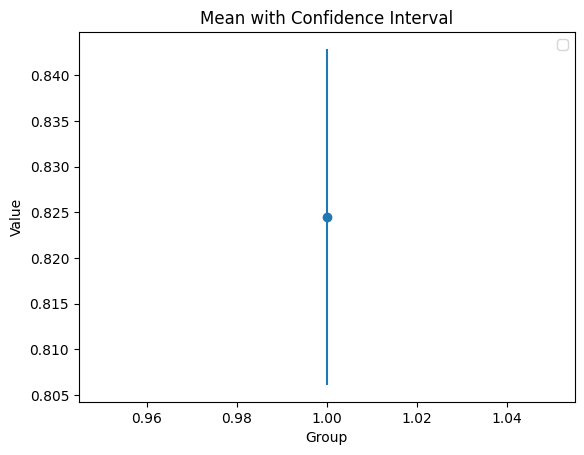

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, classification_report_dt_bmi, decision_tree = ML_algorithms.model_dt(df_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1434
           1       0.88      0.93      0.90      1375

    accuracy                           0.90      2809
   macro avg       0.90      0.90      0.90      2809
weighted avg       0.90      0.90      0.90      2809



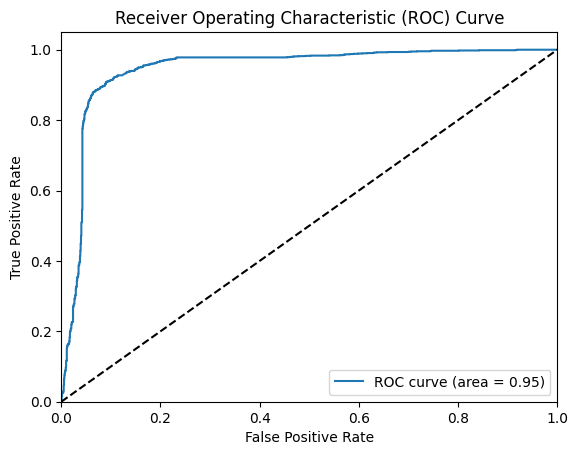

AUC Score: 0.9450122987194116


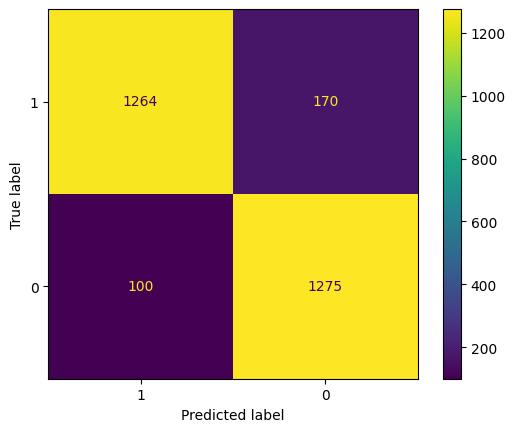

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7366548042704626, 0.7900355871886121, 0.800711743772242, 0.7758007117437722, 0.7935943060498221, 0.7117437722419929, 0.7686832740213523, 0.8220640569395018, 0.797153024911032, 0.775]
Mean accuracy: 0.7771441281138791
95% confidence interval: (0.7540192130281094, 0.8002690431996489)


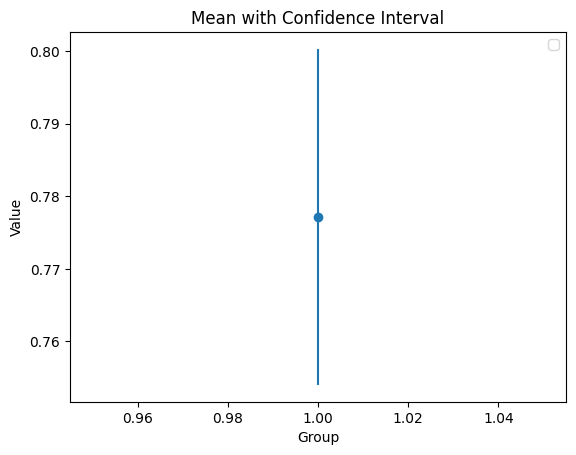

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, classification_report_svm_bmi, svm = ML_algorithms.model_svm(df_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_bmi, 'bmi')

Outliers found:


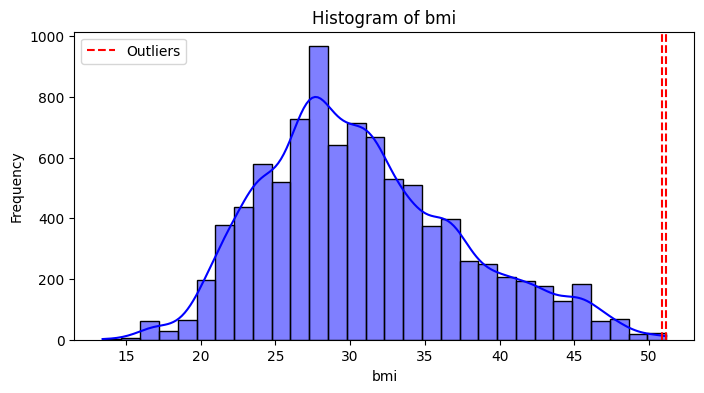

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1434
           1       0.82      0.85      0.84      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.624033, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6554\nvalue = [3283, 3271]\nclass = 0')


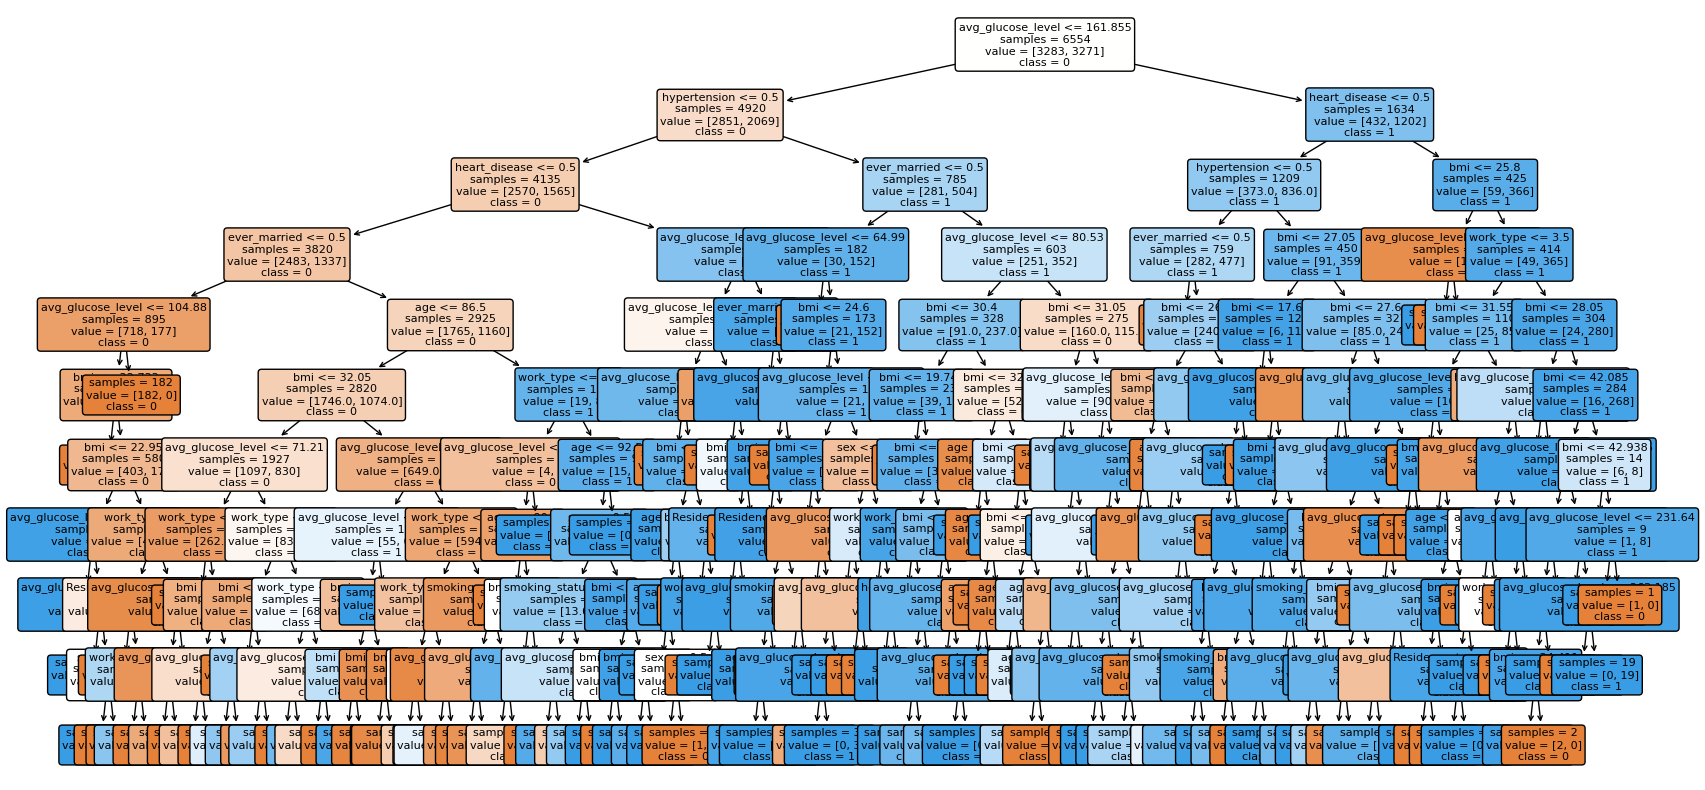

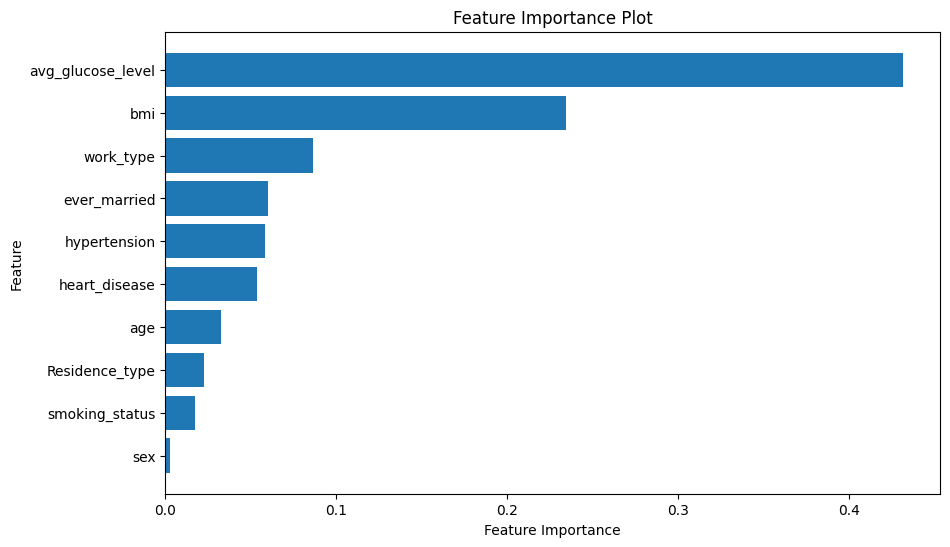

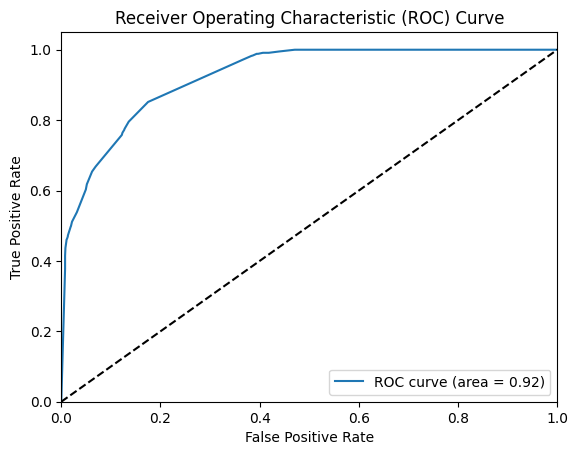

AUC Score: 0.923964752123748


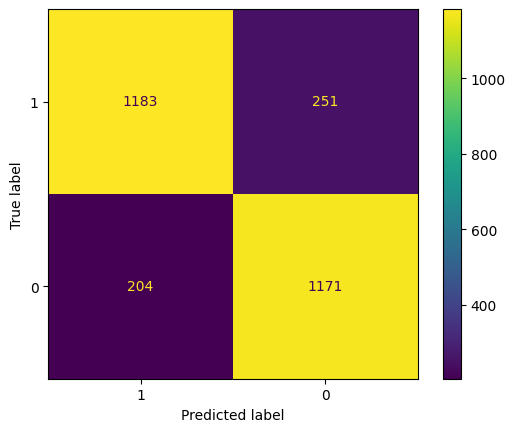

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8149466192170819, 0.8327402135231317, 0.8861209964412812, 0.8398576512455516, 0.8185053380782918, 0.8149466192170819, 0.8113879003558719, 0.8185053380782918, 0.8149466192170819, 0.7928571428571428]
Mean accuracy: 0.8244814438230808
95% confidence interval: (0.8066058322273014, 0.8423570554188601)


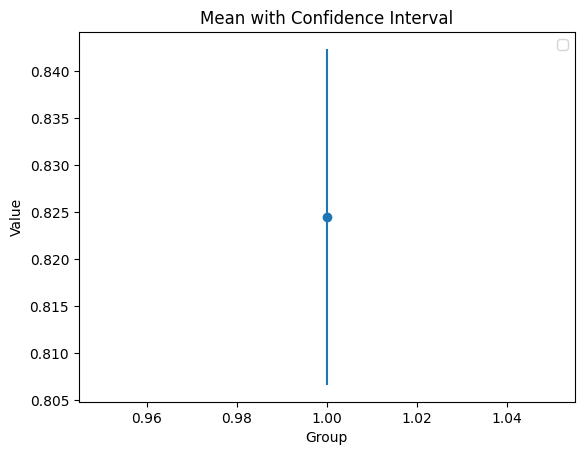

In [30]:
y_prob_dt_20_bmi, y_test_dt_20_bmi, classification_report_dt_20_bmi, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1434
           1       0.88      0.93      0.91      1375

    accuracy                           0.90      2809
   macro avg       0.91      0.91      0.90      2809
weighted avg       0.91      0.90      0.90      2809



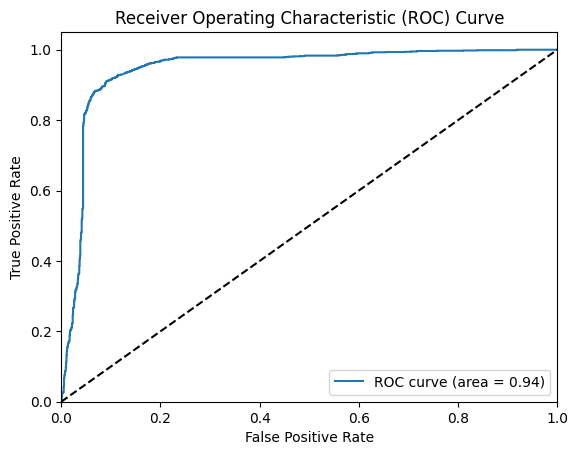

AUC Score: 0.9447229618359325


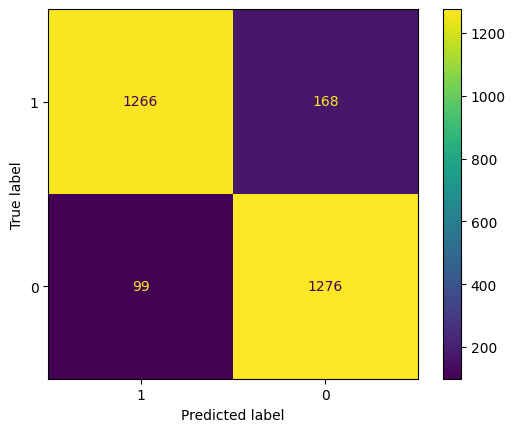

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8256227758007118, 0.7793594306049823, 0.7366548042704626, 0.7758007117437722, 0.7651245551601423, 0.7864768683274022, 0.7829181494661922, 0.8042704626334519, 0.7615658362989324, 0.7571428571428571]
Mean accuracy: 0.7774936451448907
95% confidence interval: (0.7595882160994408, 0.7953990741903406)


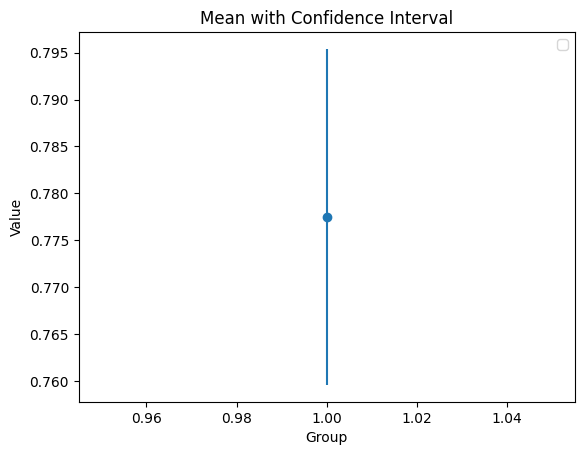

--------------------------------------


In [31]:
y_prob_svm_20_bmi, y_test_svm_20_bmi, classification_report_svm_20_bmi, svm = ML_algorithms.model_svm(df_mean_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## Categorical

In [32]:
df = df_clean.copy()

Value counts:
work_type
4    5833
3    2123
2    1265
1     122
0      20
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


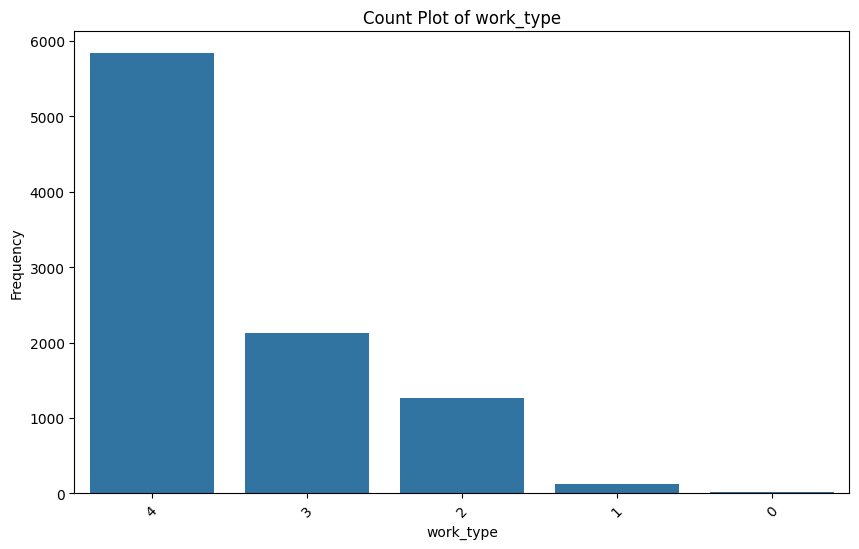

In [33]:
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 10, df)

Least frequent value:  0


Value counts:
work_type
4    5250
3    1917
2    1134
0     954
1     108
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 0, 1]
Outliers found:


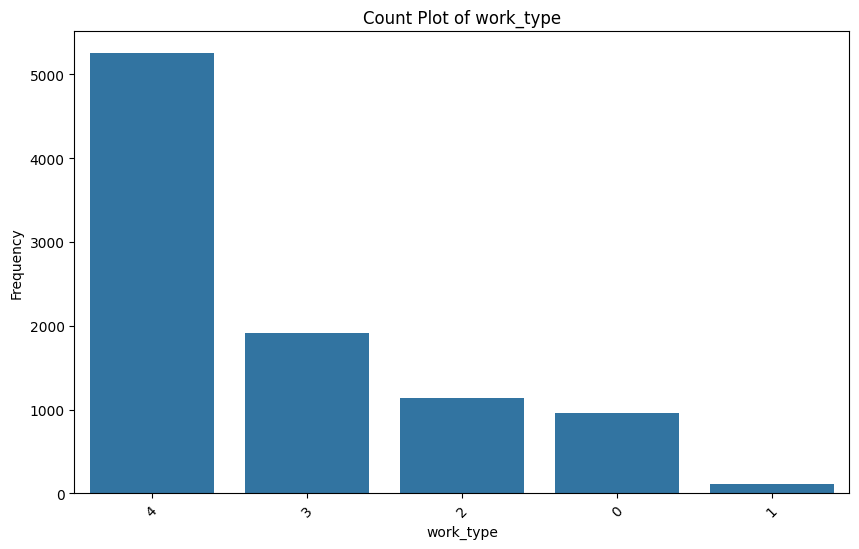

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.71      0.80      1434
           1       0.76      0.94      0.84      1375

    accuracy                           0.82      2809
   macro avg       0.84      0.83      0.82      2809
weighted avg       0.84      0.82      0.82      2809

Node Labels:
 Annotation(0.653766, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


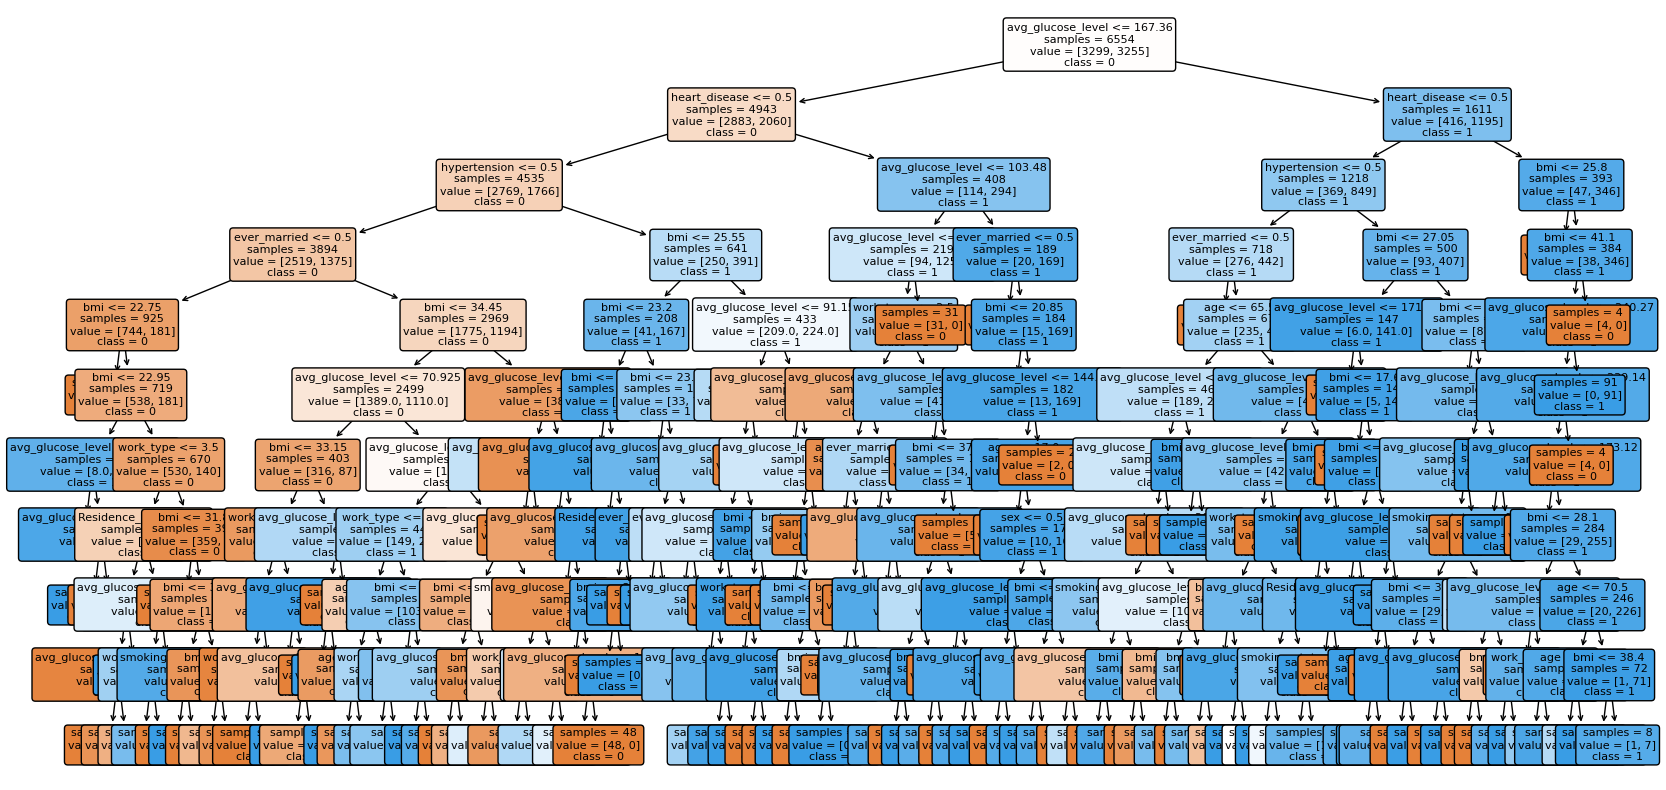

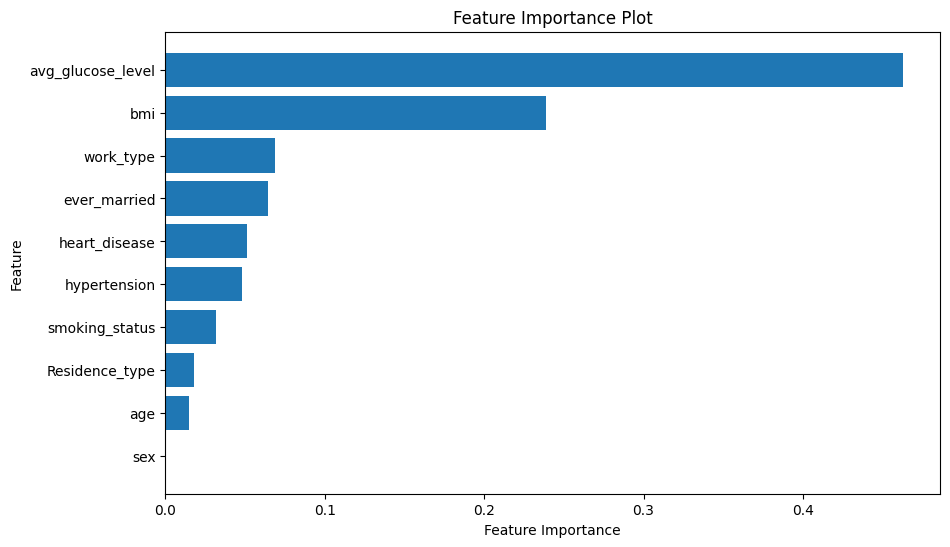

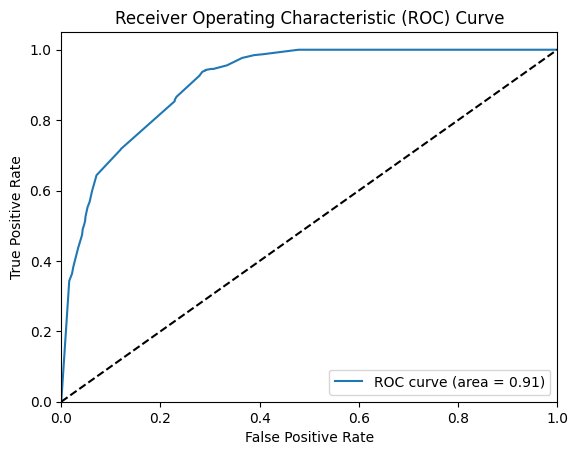

AUC Score: 0.9092544693799924


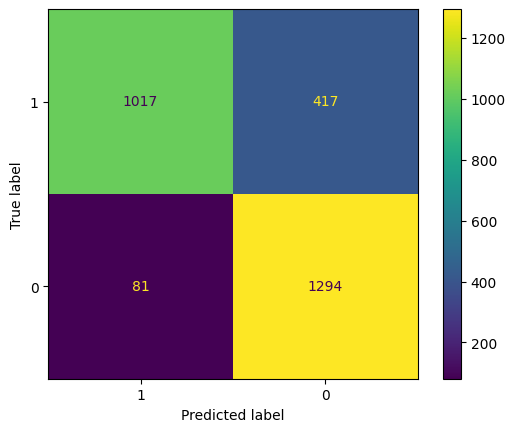

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8327402135231317, 0.8469750889679716, 0.7686832740213523, 0.8469750889679716, 0.8291814946619217, 0.8220640569395018, 0.8113879003558719, 0.8256227758007118, 0.8647686832740213, 0.7821428571428571]
Mean accuracy: 0.8230541433655313
95% confidence interval: (0.8020087929633363, 0.8440994937677263)


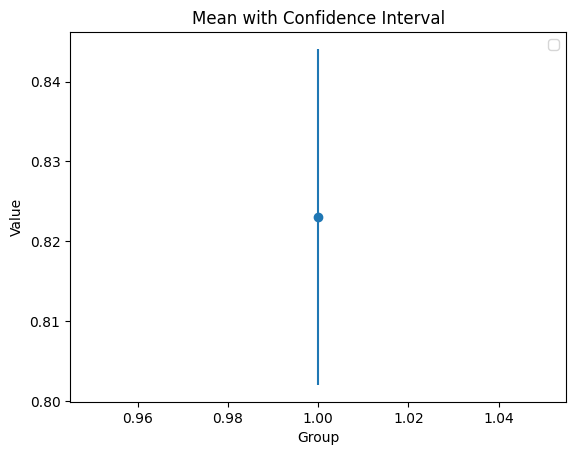

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, classification_report_dt_categorical, decision_tree = ML_algorithms.model_dt(df_categorical, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1434
           1       0.79      0.88      0.83      1375

    accuracy                           0.83      2809
   macro avg       0.83      0.83      0.83      2809
weighted avg       0.83      0.83      0.83      2809



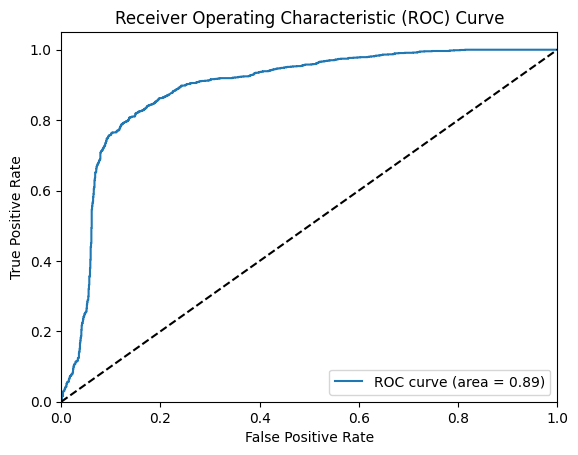

AUC Score: 0.8890229491568404


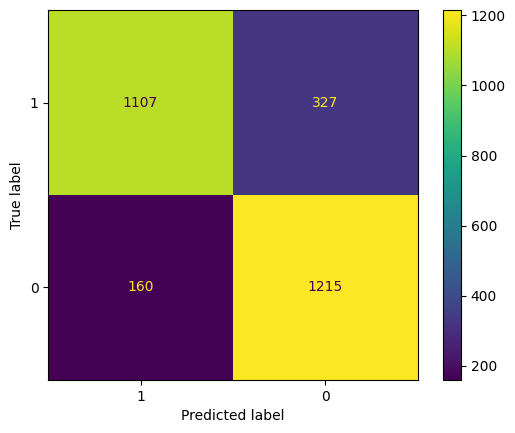

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7793594306049823, 0.7615658362989324, 0.7686832740213523, 0.7259786476868327, 0.7935943060498221, 0.7758007117437722, 0.7651245551601423, 0.7900355871886121, 0.7793594306049823, 0.7678571428571429]
Mean accuracy: 0.7707358922216574
95% confidence interval: (0.7572456085191569, 0.7842261759241579)


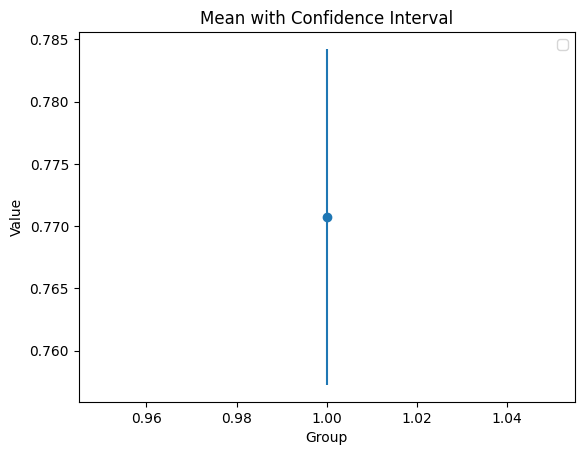

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, classification_report_svm_categorical, svm = ML_algorithms.model_svm(df_categorical, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

print('--------------------------------------')

## Conclusion

### ROC Curve

**Decision Tree**

Decision Tree


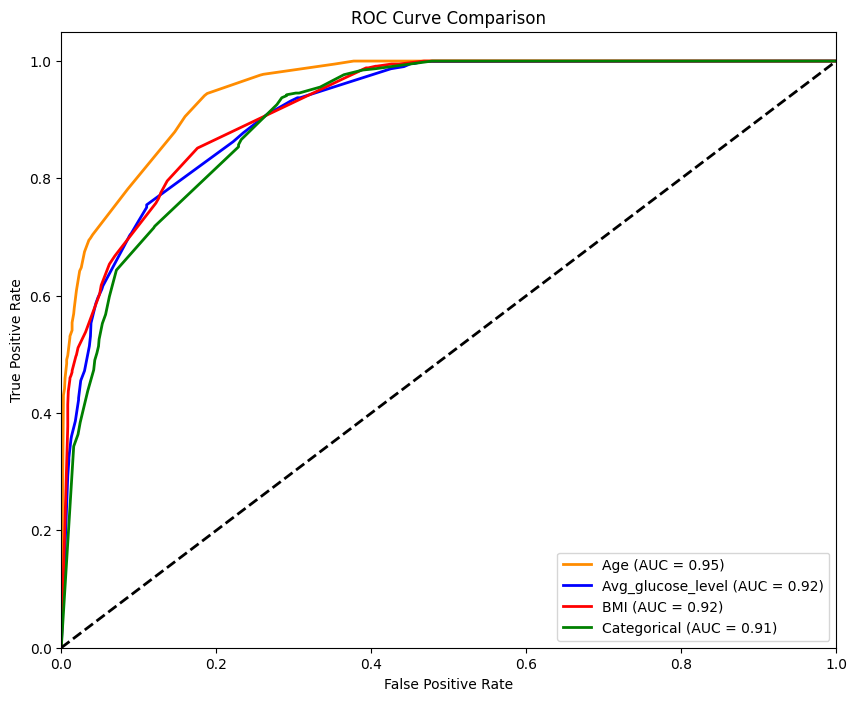

In [38]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_categorical_dt, y_test_categorical_dt, 'Categorical')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Decision Tree - substitution of outliers**

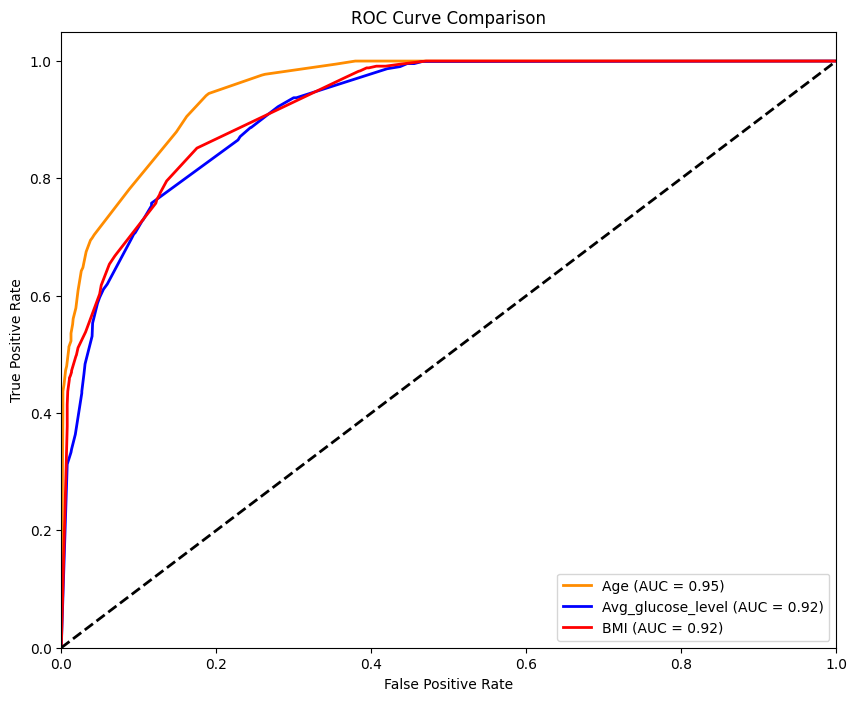

In [39]:
roc_results = [
    (y_prob_dt_20_age, y_test_dt_20_age, 'Age'),
    (y_prob_dt_20_glucose, y_test_dt_20_glucose, 'Avg_glucose_level'),
    (y_prob_dt_20_bmi, y_test_dt_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine**

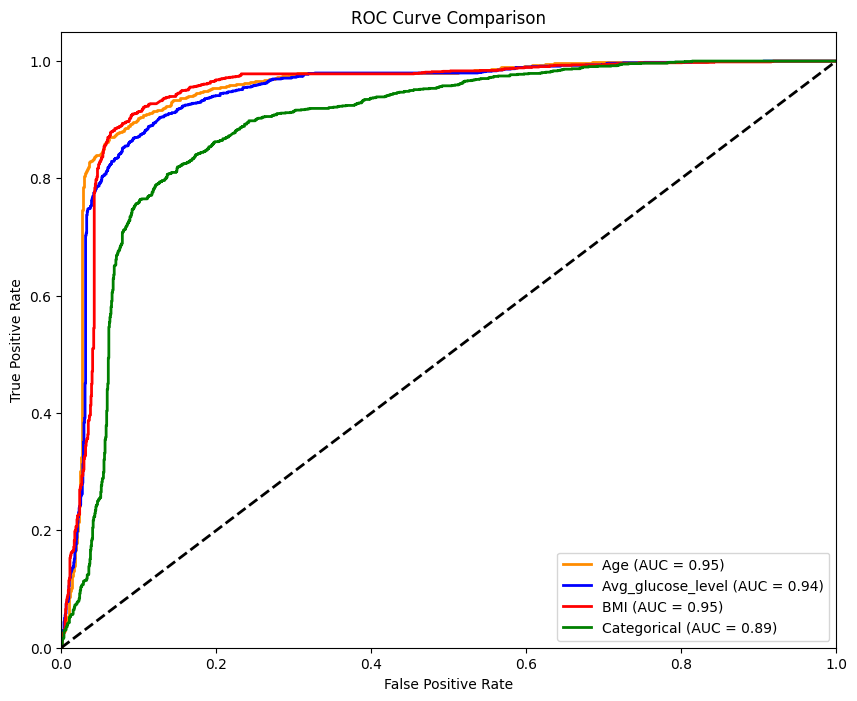

In [40]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_categorical_svm, y_test_categorical_svm, 'Categorical')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine - substitution of outliers**

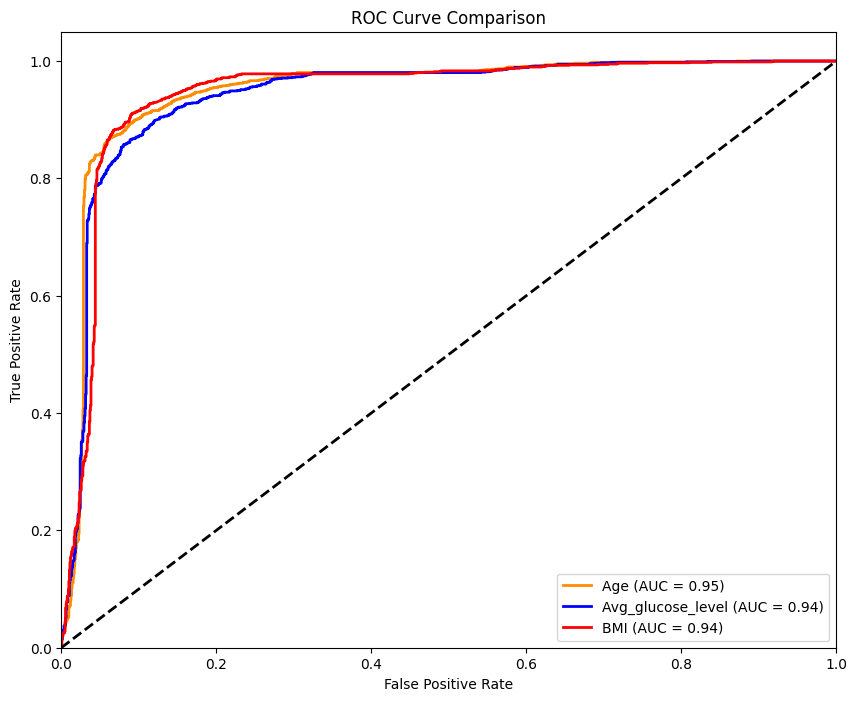

In [41]:
roc_results = [
    (y_prob_svm_20_age, y_test_svm_20_age, 'Age'),
    (y_prob_svm_20_glucose, y_test_svm_20_glucose, 'Avg_glucose_level'),
    (y_prob_svm_20_bmi, y_test_svm_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Classification report

**Decision Tree**

In [42]:
print('Classification report - Decision Tree - Age')
print(classification_report_dt_age)
print('Classification report - Decision Tree - Avg_glucose_level')
print(classification_report_dt_glucose)
print('Classification report - Decision Tree - BMI')
print(classification_report_dt_bmi)
print('Classification report - Decision Tree - Categorical')
print(classification_report_dt_categorical)

Classification report - Decision Tree - Age
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1434
           1       0.83      0.94      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.88      0.88      0.88      2809

Classification report - Decision Tree - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1434
           1       0.78      0.88      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.83      0.82      0.82      2809

Classification report - Decision Tree - BMI
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1434
           1       0.82      0.85      0.84      1375

    accuracy                        

**Decision Tree - substitution of outliers**

In [43]:
print('Classification report - Decision Tree - Age')
print(classification_report_dt_20_age)
print('Classification report - Decision Tree - Avg_glucose_level')
print(classification_report_dt_20_glucose)
print('Classification report - Decision Tree - BMI')
print(classification_report_dt_20_bmi)

Classification report - Decision Tree - Age
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1434
           1       0.83      0.94      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.88      0.88      0.88      2809

Classification report - Decision Tree - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1434
           1       0.78      0.89      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.83      0.82      0.82      2809
weighted avg       0.83      0.82      0.82      2809

Classification report - Decision Tree - BMI
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1434
           1       0.82      0.85      0.84      1375

    accuracy                        

**Support Vector Machine**

In [44]:
print('Classification report - SVM - Age')
print(classification_report_svm_age)
print('Classification report - SVM - Avg_glucose_level')
print(classification_report_svm_glucose)
print('Classification report - SVM - BMI')
print(classification_report_svm_bmi)
print('Classification report - SVM - Categorical')
print(classification_report_svm_categorical)

Classification report - SVM - Age
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1434
           1       0.89      0.91      0.90      1375

    accuracy                           0.90      2809
   macro avg       0.90      0.90      0.90      2809
weighted avg       0.90      0.90      0.90      2809

Classification report - SVM - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1434
           1       0.87      0.90      0.89      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809

Classification report - SVM - BMI
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1434
           1       0.88      0.93      0.90      1375

    accuracy                           0.90      2809
   macro avg

**Support Vector Machine - substitution of outliers**

In [45]:
print('Classification report - SVM - Age')
print(classification_report_svm_20_age)
print('Classification report - SVM - Avg_glucose_level')
print(classification_report_svm_20_glucose)
print('Classification report - SVM - BMI')
print(classification_report_svm_20_bmi)

Classification report - SVM - Age
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1434
           1       0.89      0.91      0.90      1375

    accuracy                           0.90      2809
   macro avg       0.90      0.90      0.90      2809
weighted avg       0.90      0.90      0.90      2809

Classification report - SVM - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1434
           1       0.87      0.90      0.89      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809

Classification report - SVM - BMI
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1434
           1       0.88      0.93      0.91      1375

    accuracy                           0.90      2809
   macro avg